In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

In [82]:
status = pd.read_csv('./csv/status_of_cases.csv').set_index('last_update')
status = status.loc['2020-03-10':]
status = status.set_index(pd.to_datetime(status.index))

In [83]:
s = status.groupby(status.index.date).positive_confirmed.max()
s.index.name = "Covid19 in Ontario"
s = pd.DataFrame(s)
s['new_case'] = s.diff()
s.style.bar(subset=["positive_confirmed",], color='#FFA07A')\
                 .bar(subset=["new_case"], color='#ee1f5f')

,positive_confirmed,new_case
Covid19 in Ontario,,
2020-03-10,31,nan
2020-03-11,37,6
2020-03-12,54,17
2020-03-13,74,20
2020-03-14,98,24
2020-03-15,140,42
2020-03-16,172,32
2020-03-17,183,11
2020-03-18,206,23


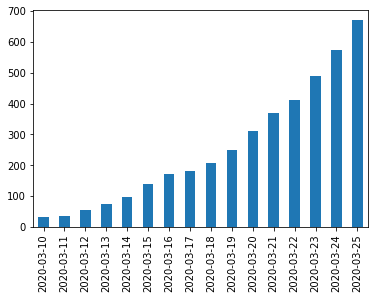

In [84]:
status.positive_confirmed.groupby(status.index.date).max().plot.bar();

In [85]:
df = pd.read_csv('./csv/cases.csv').set_index('last_update')
df.index = pd.to_datetime(df.index)
df.head(5)

,case_number,hospital,patient,public_health_unit,status,transmission
last_update,,,,,,
2020-03-09 10:30:00,32,brampton civic hospital,50s male,peel public health,self-isolating,travel (germany)
2020-03-09 10:30:00,33,north york general hospital,80s male,toronto public health,self-isolating,travel (iran)
2020-03-09 10:30:00,34,north york general hospital,70s female,toronto public health,self-isolating,travel (iran)
2020-03-10 10:30:00,36,st. joseph's health centre,40s male,toronto public health,self-isolating,travel (switzerland)
2020-03-11 10:30:00,37,health sciences north,50s male,sudbury and district health unit,self-isolating,pending


In [86]:
df.groupby(df.index)['case_number'].count()

last_update
2020-03-09 10:30:00      3
2020-03-10 10:30:00      1
2020-03-11 10:30:00      5
2020-03-12 10:30:00     17
2020-03-13 10:30:00     20
2020-03-14 10:30:00     22
2020-03-14 17:30:00     22
2020-03-15 10:30:00     39
2020-03-15 17:30:00     39
2020-03-16 10:30:00     32
2020-03-16 17:30:00     32
2020-03-17 10:30:00      8
2020-03-17 17:30:00      8
2020-03-18 10:30:00     23
2020-03-19 10:30:00     43
2020-03-19 17:30:00     43
2020-03-20 17:30:00     50
2020-03-21 10:30:00     59
2020-03-22 10:30:00     47
2020-03-22 17:30:00     47
2020-03-23 17:30:00     78
2020-03-24 10:30:00     85
2020-03-25 10:30:00    100
2020-03-25 17:30:00    100
Name: case_number, dtype: int64

In [30]:
df_toronto = df[df.public_health_unit.str.contains('simcoe')]
df_toronto.case_number.groupby(df_toronto.index.date).count()

2020-03-12    1
2020-03-15    4
2020-03-18    1
Name: case_number, dtype: int64

In [67]:
df.case_number.unique().shape

(531,)